In [1]:
# Importing Libraries

import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading Dataset

data = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")

In [6]:
# Reading top 5 rows of our dataset

data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
data.shape

(17880, 18)

In [8]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# Let us remove the columns which are not necessary

data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [11]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
data.shape

(17880, 13)

In [13]:
# Fill NaN values with blank space

data.fillna(' ', inplace=True)

In [14]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## **Exploratory Data Analysis**

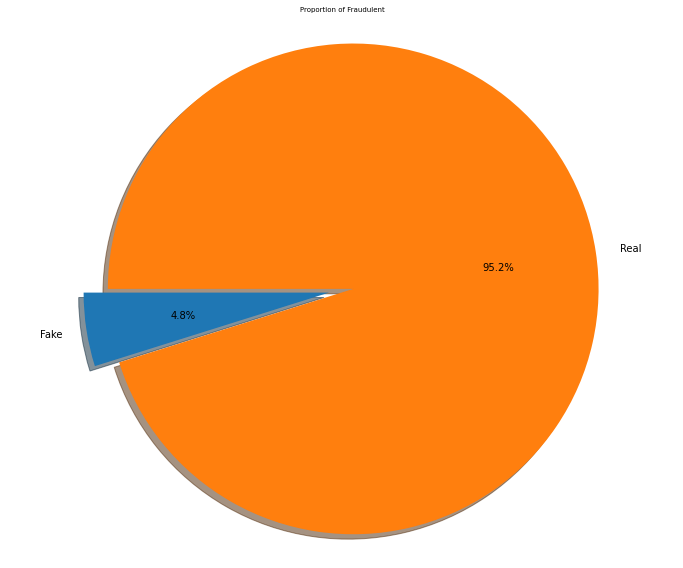

In [15]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

**In the next step, we will visualize the number of job postings by countries and by experience**

In [16]:
#Visualize job postings by countries
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

Text(0.5, 0, 'Countries')

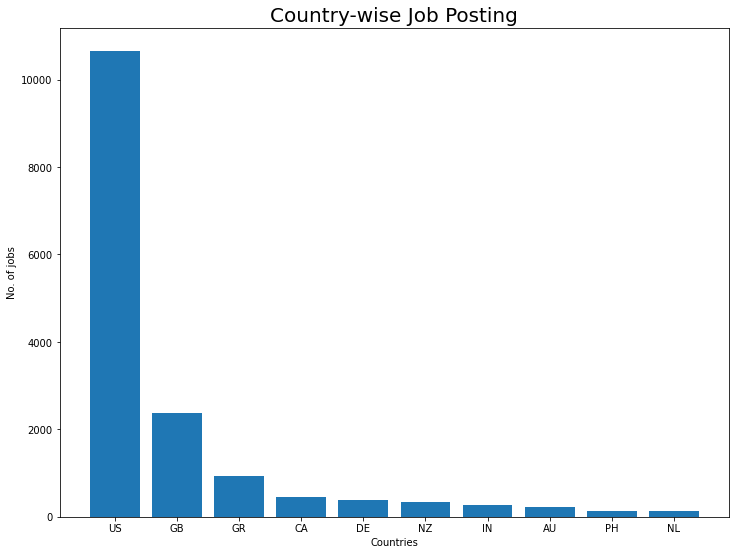

In [17]:
country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

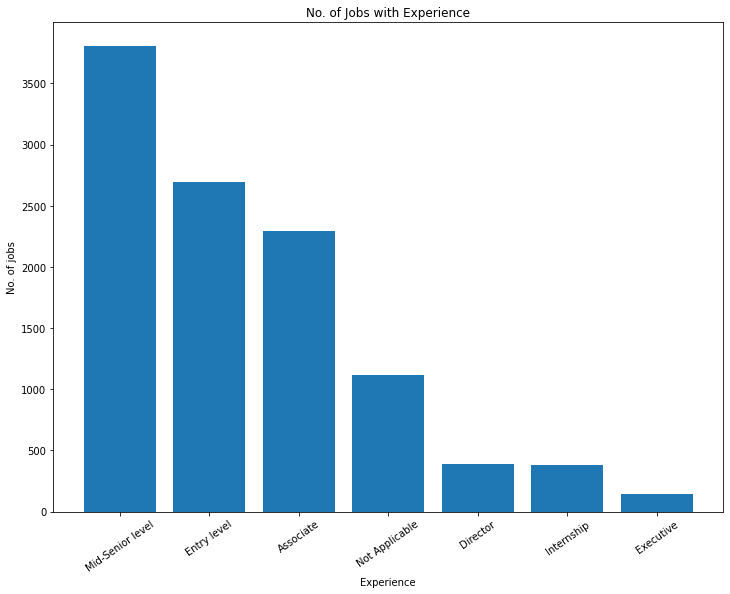

In [18]:
#Visualize the required experiences in the jobs
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [19]:
#Most frequent jobs
print(data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [20]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [21]:
#Titles and count of real jobs
print(data[data.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [22]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [23]:
#combine text in a single column to start cleaning our data
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [24]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


**Understanding the common words used in the texts : Wordcloud**

In [25]:
#Let's visualize all the words our data using the wordcloud plot

all_words = ''.join([text for text in data["text"]]) 
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

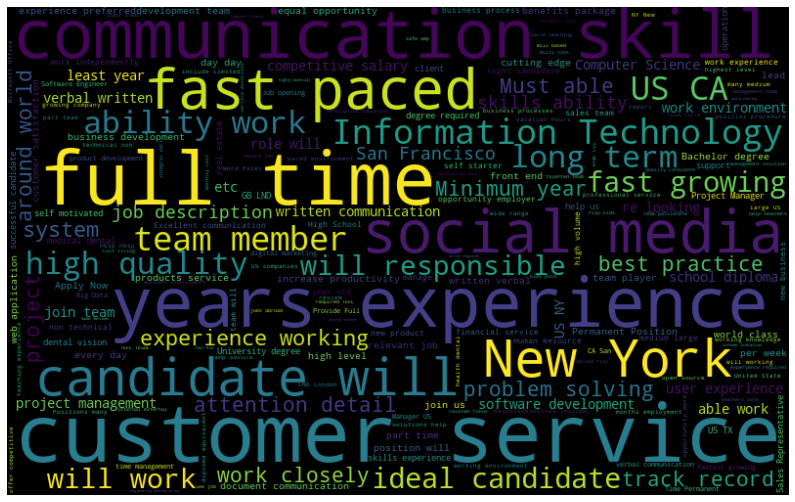

In [28]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])

In [30]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)

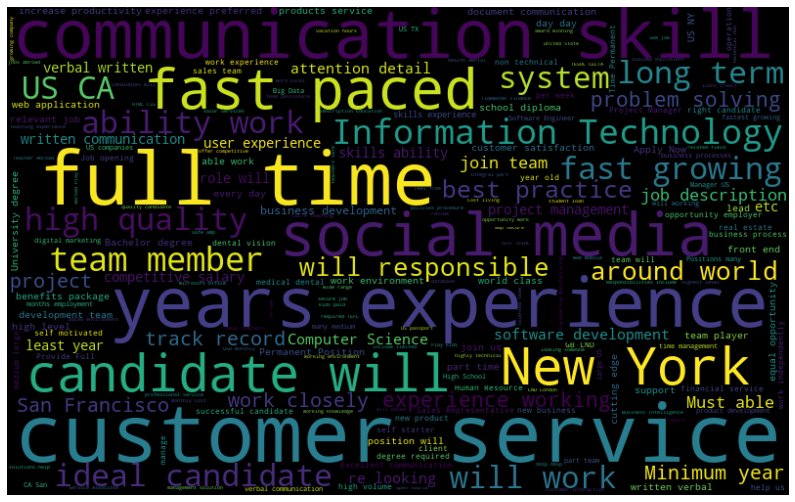

In [31]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [33]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

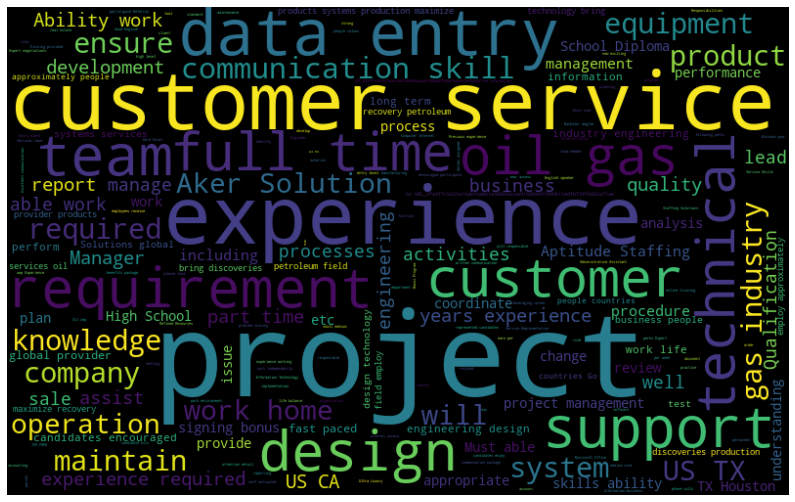

In [34]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Engineering/ Data Preparation 

In [35]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [36]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
#checking what all words are considered as stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [39]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [40]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [41]:
data['text'][0]

"marketing intern us, ny, new york we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging existing food

## Model Building

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [51]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

#Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(12516,)
(12516,)
(5364,)
(5364,)


In [52]:
#  instantiate the vectorizer
vect = CountVectorizer()

In [53]:
# learn training data vocabulary, then use it to create a document-term matrix

# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [54]:
# examine the document-term matrix
X_train_dtm

<12516x86863 sparse matrix of type '<class 'numpy.int64'>'
	with 2322869 stored elements in Compressed Sparse Row format>

In [55]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86863 sparse matrix of type '<class 'numpy.int64'>'
	with 975167 stored elements in Compressed Sparse Row format>

In [56]:
# Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [57]:
y_pred_nb = nb.predict(X_test_dtm)

In [58]:
accuracy_score(y_test, y_pred_nb)

0.9765100671140939

In [59]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [60]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 14.5 s, sys: 19 ms, total: 14.5 s
Wall time: 14.5 s


DecisionTreeClassifier()

In [61]:
X_test

8139     tibco architect us, ga, johns creek samprasoft...
16938    appointment coordinator us, oh, cincinnati lei...
15058    electrical controls engineer us, ca, los angel...
15433    project manager us, ny, new york city namely l...
9311     engineering lead us, , located heart downtown ...
                               ...                        
15108    english teacher abroad us, wv, shepherdstown h...
10879    electrical maintenance technician us, mn, minn...
7909     business development specialist ca, bc, vancou...
7852     web developer gr, , ogilvyone worldwide, athen...
15390    design internship gb, lnd, london dice gets fa...
Name: text, Length: 5364, dtype: object

In [62]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [63]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.9835943325876212
Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5111
           1       0.88      0.75      0.81       253

    accuracy                           0.98      5364
   macro avg       0.93      0.87      0.90      5364
weighted avg       0.98      0.98      0.98      5364

Confusion Matrix

[[5085   26]
 [  62  191]]


Text(69.0, 0.5, 'Truth')

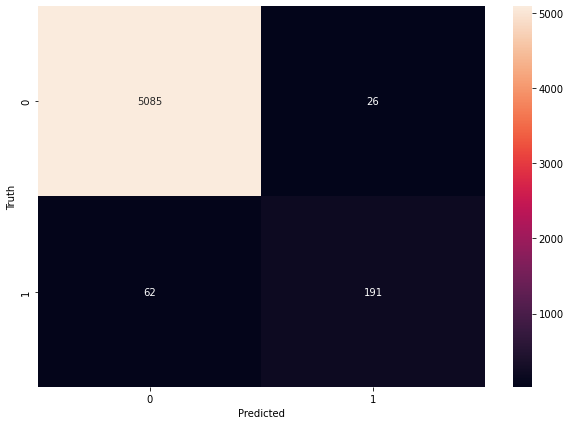

In [64]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [65]:
X_test

8139     tibco architect us, ga, johns creek samprasoft...
16938    appointment coordinator us, oh, cincinnati lei...
15058    electrical controls engineer us, ca, los angel...
15433    project manager us, ny, new york city namely l...
9311     engineering lead us, , located heart downtown ...
                               ...                        
15108    english teacher abroad us, wv, shepherdstown h...
10879    electrical maintenance technician us, mn, minn...
7909     business development specialist ca, bc, vancou...
7852     web developer gr, , ogilvyone worldwide, athen...
15390    design internship gb, lnd, london dice gets fa...
Name: text, Length: 5364, dtype: object

In [67]:
input_text = ["new product development project leader us, oh, cincinnati provide full time permanent positions many medium large us companies. interested finding/recruiting high quality candidates it, engineering, manufacturing highly technical non-technical jobs. (we 1500 job openings website relevant job. feel free search website apply directly. click “apply now” redirect main website search jobs.)location - atlanta, ga, usajob type – permanentjob requirements &amp; responsibilities –specific responsibilitiescoordination project management new product development projects:act team leader perform project management duties new product development projects leading cross functional teams defined gated npd process.lead cross functional teams development project timeline maintain throughout life project. periodically present status project management.facilitate coordinate project activities minimize project timelines.assign alternate members find alternative resources personally complete project tasks team members absent unable complete tasks per timeline.develop manage project budget team including development expense capital tooling expense tooling.guide team develop new products meet cost targets. primarily responsible creating preliminary product cost estimates conjunction engineering. primarily responsible accuracy preliminary cost estimates final costing products.define roles &amp; responsibilities team members undefined processes new processes created unique instances occur.manage collection project data npd process gate exits release shipment documents.facilitate team meetings record meeting minutes.connect members appropriate personnel including manufacturing test labs legal etc.drive team manufacturing personnel supply chain towards time completion pilot build inventory build.education experience requirementsbachelor science degree engineering (or applicable four year degree) minimum eight years experience project management product design process engineering manufacturing engineering. alternately fifteen years experience proven ability related field work environment. experience managing projects working cross-functional team environment and/or functioning project team leader required. strong organizational communication skills required."]

# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('This a Fraudulant Job')

else:
  print('This is a Real Job')

[0]
This is a Real Job
